In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [7]:
df = pd.read_csv("Capstone1.csv")

In [9]:
df.head()

,Date,Facebook Ad Campaign,Facebook Ad Views,Facebook Ad Clicks,Facebook Ad Conversions,Cost per Facebook Ad,Facebook Click-Through Rate (Clicks / View),Facebook Conversion Rate (Conversions / Clicks),Facebook Cost per Click (Ad Cost / Clicks),AdWords Ad Campaign,AdWords Ad Views,AdWords Ad Clicks,AdWords Ad Conversions,Cost per AdWords Ad,AdWords Click-Through Rate (Clicks / View),AdWords Conversion Rate (Conversions / Click),AdWords Cost per Click (Ad Cost / Clicks)
0,1/1/2023,FB_Jan,2116,18,8,$126,0.83%,42.73%,$7.14,AW_Jan,4984,59,5,$234,1.18%,8.40%,$3.30
1,1/2/2023,FB_Jan,3106,36,12,$104,1.15%,34.04%,$2.91,AW_Jan,4022,71,6,$75,1.77%,7.80%,$1.05
2,1/3/2023,FB_Jan,3105,26,8,$102,0.84%,31.45%,$3.89,AW_Jan,3863,44,4,$141,1.13%,9.59%,$3.23
3,1/4/2023,FB_Jan,1107,27,9,$71,2.45%,34.76%,$2.62,AW_Jan,3911,49,5,$141,1.26%,11.08%,$2.86
4,1/5/2023,FB_Jan,1317,15,7,$78,1.10%,47.59%,$5.38,AW_Jan,4070,55,7,$133,1.36%,12.22%,$2.40


In [11]:
df.shape

(365, 17)

In [13]:
df.dtypes

Date                                               object
Facebook Ad Campaign                               object
Facebook Ad Views                                   int64
Facebook Ad Clicks                                  int64
Facebook Ad Conversions                             int64
Cost per Facebook Ad                               object
Facebook Click-Through Rate (Clicks / View)        object
Facebook Conversion Rate (Conversions / Clicks)    object
Facebook Cost per Click (Ad Cost / Clicks)         object
AdWords Ad Campaign                                object
AdWords Ad Views                                    int64
AdWords Ad Clicks                                   int64
AdWords Ad Conversions                              int64
Cost per AdWords Ad                                object
AdWords Click-Through Rate (Clicks / View)         object
AdWords Conversion Rate (Conversions / Click)      object
AdWords Cost per Click (Ad Cost / Clicks)          object
dtype: object

In [15]:
df['Date'] = pd.to_datetime(df['Date'])

* Convert object column into integer for future analysis

In [18]:
char_to_remove = ['$', '%']
col_to_remove = ['Cost per Facebook Ad', 'Facebook Click-Through Rate (Clicks / View)','Facebook Conversion Rate (Conversions / Clicks)',
                'Facebook Cost per Click (Ad Cost / Clicks)','Cost per AdWords Ad', 'AdWords Click-Through Rate (Clicks / View)',
                'AdWords Conversion Rate (Conversions / Click)','AdWords Cost per Click (Ad Cost / Clicks)']

In [20]:
for char in char_to_remove:
    for col in col_to_remove:
        df[col] = df[col].str.replace(char,"")

In [22]:
df.head(2)

,Date,Facebook Ad Campaign,Facebook Ad Views,Facebook Ad Clicks,Facebook Ad Conversions,Cost per Facebook Ad,Facebook Click-Through Rate (Clicks / View),Facebook Conversion Rate (Conversions / Clicks),Facebook Cost per Click (Ad Cost / Clicks),AdWords Ad Campaign,AdWords Ad Views,AdWords Ad Clicks,AdWords Ad Conversions,Cost per AdWords Ad,AdWords Click-Through Rate (Clicks / View),AdWords Conversion Rate (Conversions / Click),AdWords Cost per Click (Ad Cost / Clicks)
0,2023-01-01,FB_Jan,2116,18,8,126,0.83,42.73,7.14,AW_Jan,4984,59,5,234,1.18,8.40,3.30
1,2023-01-02,FB_Jan,3106,36,12,104,1.15,34.04,2.91,AW_Jan,4022,71,6,75,1.77,7.80,1.05


In [20]:
for col in col_to_remove:
    df[col] = df[col].astype(float)

In [22]:
df.dtypes

Date                                               datetime64[ns]
Facebook Ad Campaign                                       object
Facebook Ad Views                                           int64
Facebook Ad Clicks                                          int64
Facebook Ad Conversions                                     int64
Cost per Facebook Ad                                      float64
Facebook Click-Through Rate (Clicks / View)               float64
Facebook Conversion Rate (Conversions / Clicks)           float64
Facebook Cost per Click (Ad Cost / Clicks)                float64
AdWords Ad Campaign                                        object
AdWords Ad Views                                            int64
AdWords Ad Clicks                                           int64
AdWords Ad Conversions                                      int64
Cost per AdWords Ad                                       float64
AdWords Click-Through Rate (Clicks / View)                float64
AdWords Co

In [24]:
#Check Null values
df.isnull().sum()

Date                                               0
Facebook Ad Campaign                               0
Facebook Ad Views                                  0
Facebook Ad Clicks                                 0
Facebook Ad Conversions                            0
Cost per Facebook Ad                               0
Facebook Click-Through Rate (Clicks / View)        0
Facebook Conversion Rate (Conversions / Clicks)    0
Facebook Cost per Click (Ad Cost / Clicks)         0
AdWords Ad Campaign                                0
AdWords Ad Views                                   0
AdWords Ad Clicks                                  0
AdWords Ad Conversions                             0
Cost per AdWords Ad                                0
AdWords Click-Through Rate (Clicks / View)         0
AdWords Conversion Rate (Conversions / Click)      0
AdWords Cost per Click (Ad Cost / Clicks)          0
dtype: int64

In [26]:
#check Duplicate values
df.duplicated().sum()

0

* ## Comparing Campaign Perfromance 

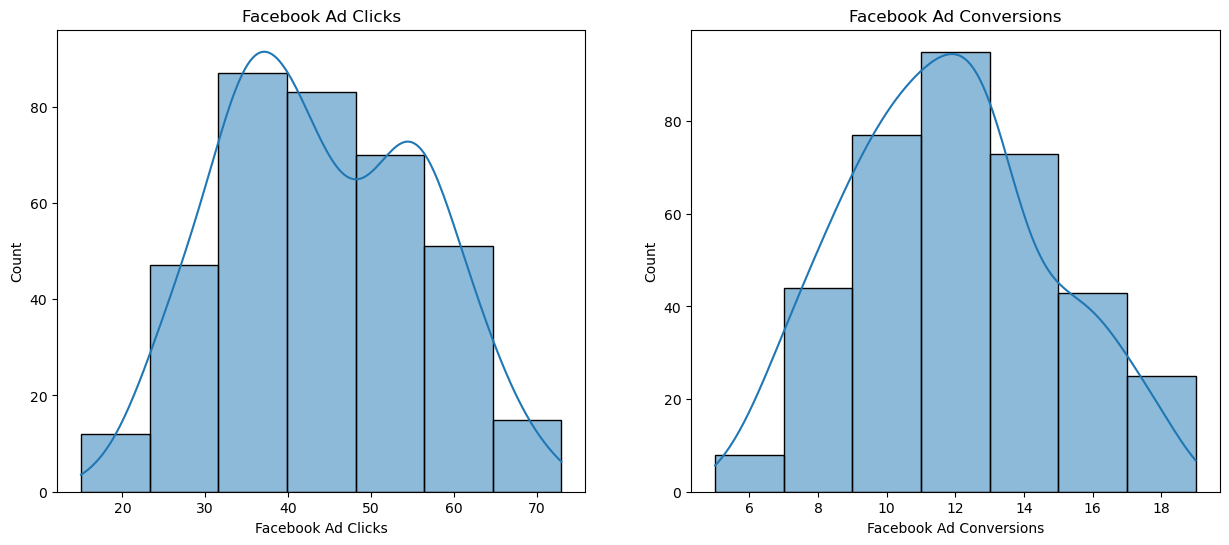

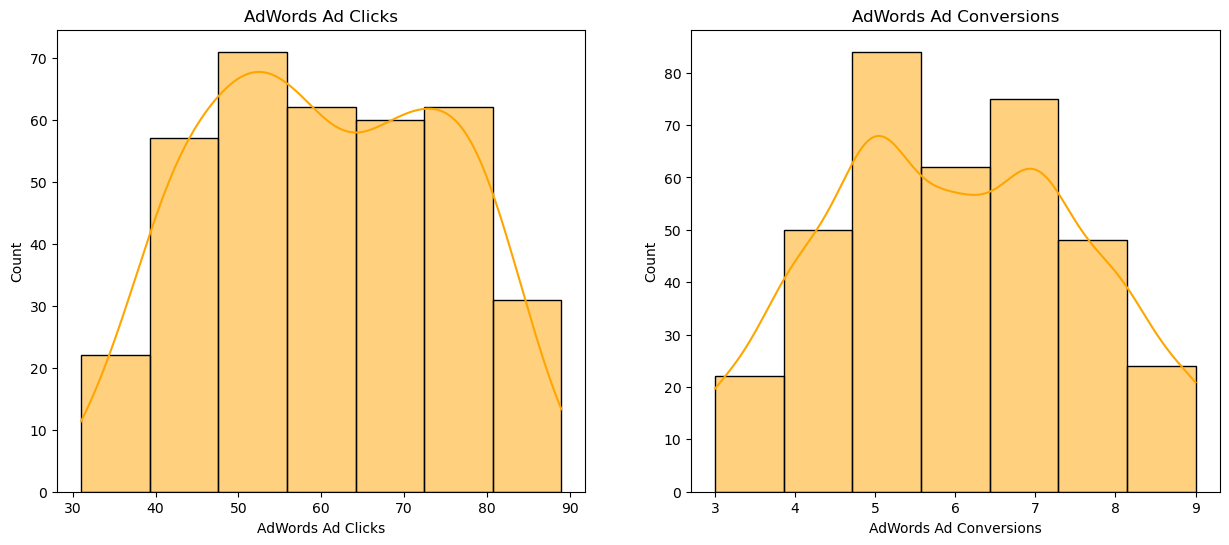

In [72]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.title('Facebook Ad Clicks')
sns.histplot(df['Facebook Ad Clicks'], kde= True, bins = 7)
plt.subplot(1,2,2)
plt.title('Facebook Ad Conversions')
sns.histplot(df['Facebook Ad Conversions'], kde= True, bins= 7)
plt.show()

plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.title('AdWords Ad Clicks')
sns.histplot(df['AdWords Ad Clicks'], kde = True, bins = 7, color='orange')
plt.subplot(1,2,2)
plt.title('AdWords Ad Conversions')
sns.histplot(df['AdWords Ad Conversions'], kde = True, bins = 7, color='orange')
plt.show()



All the histogram showing somewhat symmetrical shape. The symmetrical shape suggest that the number of clicks and conversion
are evenly distributed. Also outliers is not present in the conversion and clicks.

In [ ]:
# How frequently do we observe days with high number of conversions compared to days with low nummber of conversions?

In [81]:
df.head(3)

,Date,Facebook Ad Campaign,Facebook Ad Views,Facebook Ad Clicks,Facebook Ad Conversions,Cost per Facebook Ad,Facebook Click-Through Rate (Clicks / View),Facebook Conversion Rate (Conversions / Clicks),Facebook Cost per Click (Ad Cost / Clicks),AdWords Ad Campaign,AdWords Ad Views,AdWords Ad Clicks,AdWords Ad Conversions,Cost per AdWords Ad,AdWords Click-Through Rate (Clicks / View),AdWords Conversion Rate (Conversions / Click),AdWords Cost per Click (Ad Cost / Clicks)
0,2023-01-01,FB_Jan,2116,18,8,126.0,0.83,42.73,7.14,AW_Jan,4984,59,5,234.0,1.18,8.40,3.30
1,2023-01-02,FB_Jan,3106,36,12,104.0,1.15,34.04,2.91,AW_Jan,4022,71,6,75.0,1.77,7.80,1.05
2,2023-01-03,FB_Jan,3105,26,8,102.0,0.84,31.45,3.89,AW_Jan,3863,44,4,141.0,1.13,9.59,3.23


In [85]:
def conversion_category(conv_col):
    category = []
    for conversion in conv_col:
        if conversion < 6:
            category.append('less than 6')
        elif 6 <= conversion < 11:
            category.append('6-10')
        elif 11 <= conversion < 16:
            category.append('11-15')
        else:
            category.append('more than 15')
    return category
     

In [ ]:
#create separate column for category conversion

In [95]:
df['Facebook Ad Conversions Category'] = conversion_category(df['Facebook Ad Conversions'])
df['AdWords Ad Conversions Category'] = conversion_category(df['AdWords Ad Conversions'])

In [99]:
df.head(2)

,Date,Facebook Ad Campaign,Facebook Ad Views,Facebook Ad Clicks,Facebook Ad Conversions,Cost per Facebook Ad,Facebook Click-Through Rate (Clicks / View),Facebook Conversion Rate (Conversions / Clicks),Facebook Cost per Click (Ad Cost / Clicks),AdWords Ad Campaign,AdWords Ad Views,AdWords Ad Clicks,AdWords Ad Conversions,Cost per AdWords Ad,AdWords Click-Through Rate (Clicks / View),AdWords Conversion Rate (Conversions / Click),AdWords Cost per Click (Ad Cost / Clicks),Facebook Ad Conversions Category,AdWords Ad Conversions Category
0,2023-01-01,FB_Jan,2116,18,8,126.0,0.83,42.73,7.14,AW_Jan,4984,59,5,234.0,1.18,8.4,3.30,6-10,less than 6
1,2023-01-02,FB_Jan,3106,36,12,104.0,1.15,34.04,2.91,AW_Jan,4022,71,6,75.0,1.77,7.8,1.05,11-15,6-10


In [103]:
df['Facebook Ad Conversions Category'].value_counts()

Facebook Ad Conversions Category
11-15           189
6-10            128
more than 15     47
less than 6       1
Name: count, dtype: int64

In [117]:
fb = pd.DataFrame(df['Facebook Ad Conversions Category'].value_counts().reset_index().rename(columns= {'Facebook Ad Conversions Category': 'Category'}))

In [119]:
df['AdWords Ad Conversions Category'].value_counts()

AdWords Ad Conversions Category
6-10           209
less than 6    156
Name: count, dtype: int64

In [130]:
ad = pd.DataFrame(df['AdWords Ad Conversions Category'].value_counts().reset_index().rename(columns= {'AdWords Ad Conversions Category': 'Category'}))

In [160]:
categ_df = pd.merge(fb, ad, on= "Category", how='outer').rename(columns={'count_x': 'Facebook', "count_y":'Adwords'}).fillna(0)
categ_df.iloc[[2,1,0,3]]

,Category,Facebook,Adwords
2,less than 6,1,156.0
1,6-10,128,209.0
0,11-15,189,0.0
3,more than 15,47,0.0


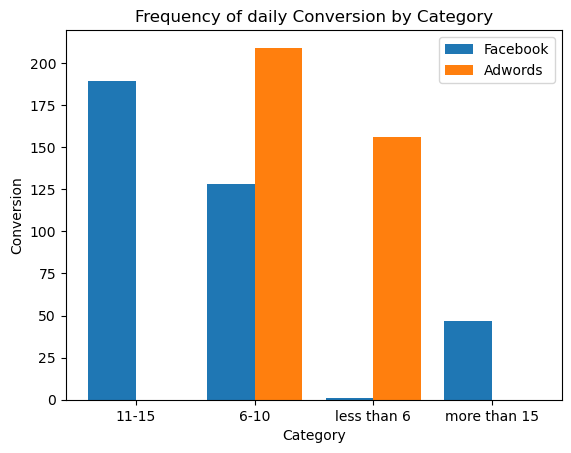

In [206]:
X = np.arange(len(categ_df))
plt.bar(X - 0.2, categ_df['Facebook'], 0.4, label = 'Facebook')
plt.bar(X + 0.2, categ_df['Adwords'], 0.4, label = 'Adwords')
plt.xticks(X, categ_df['Category'])
plt.title("Frequency of daily Conversion by Category")
plt.xlabel("Category")
plt.ylabel("Conversion")
plt.legend()
plt.show()

* From above graph we can see that, Facebook had more higher Conversion rate than Adwords.
* There is significant varaince in the number of high conversion days between two category.
* The absence of days with conversion between 11-15 and more than 15 in Adwords indicates a need to review the strategies.

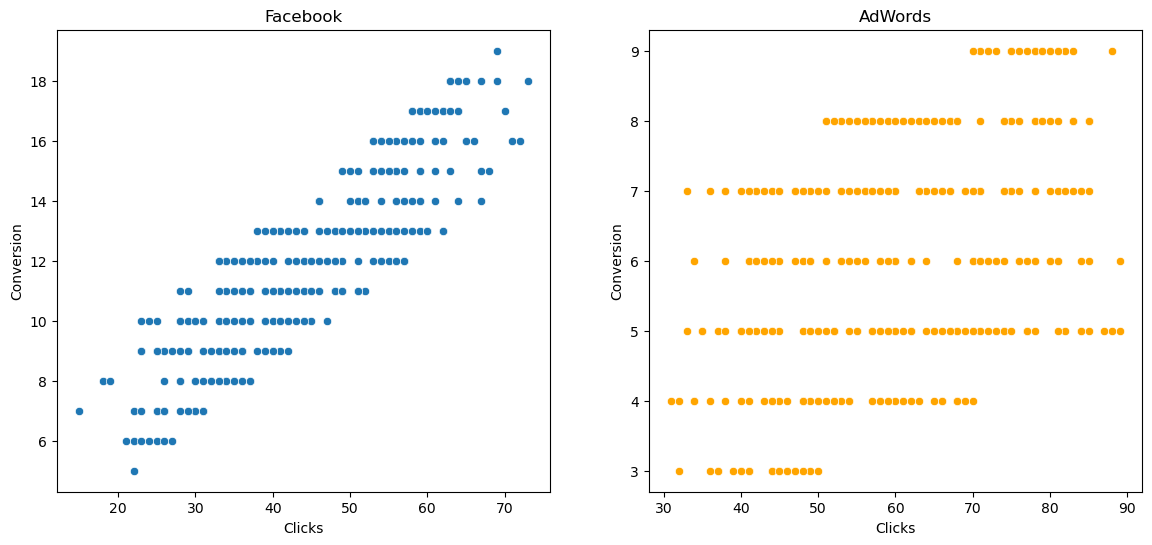

In [242]:
# find the correlation between clicks and conversion
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.title("Facebook")
sns.scatterplot(x= df['Facebook Ad Clicks'],y= df['Facebook Ad Conversions'])
plt.xlabel('Clicks')
plt.ylabel('Conversion')
plt.subplot(1,2,2)
plt.title("AdWords")
sns.scatterplot(x= df['AdWords Ad Clicks'],y= df['AdWords Ad Conversions'], color = 'orange')
plt.xlabel('Clicks')
plt.ylabel('Conversion')
plt.show()


- facebook data points shows a positive corrleation, means when clicks increase, conversion also increases.
- This trend suggest that Facebook ad are more effective in turning click to conversion.
- AdWords correlation appears weaker, means clicks not translate to conversion efeectively.
- Adwords ads may not diretly drive conversions or there are also having other influencing factor which affects.

In [263]:
fb_cor = df[['Facebook Ad Clicks','Facebook Ad Conversions']].corr()
Adw_cor = df[['AdWords Ad Clicks','AdWords Ad Conversions']].corr()

In [275]:
print(f"Facebook correlation coeffient is {fb_cor.values[0,1]:.2f}")
print(f"AdWords correlation coeffient is {Adw_cor.values[0,1]:.2f}")

Facebook correlation coeffient is 0.87
AdWords correlation coeffient is 0.45


* A correlation coefficient of 0.87 indicates strong positive linear relationship between click and conversion on facebook.
* This suggest than when th no. of clicks on facebook ad increases, sales tends to increase as well.
* Adwords correlation coefficient of 0.45 shows a weaker relationship beween clicks and conversion. While there is still a positive
  relationship but not strong as facebook.
* Adwords correlation shows that AdWords ad campagin does not contribute much to sales. There are other factors which affects the Adwords campaign        which can find through further analysis.

In [261]:
fb_cor.values[0,1]

0.8737750148613915

In [267]:
Adw_cor.values[0,1]

0.44799320094697664

* Hypothesis Testing

Hypothesis: Advertising on facebook will result in a greater no. of conversion as compared to advertising on AdWords.

NUll Hypthesis: There is No Significant difference in conversion rate between facebook and AdWords Ads.

Alternare hypothesis: Facebook Ads results in a significantly higher number of conversion compared to AdWords.

In [303]:
from scipy.stats import ttest_ind
t_stat, p_value = ttest_ind(df['Facebook Ad Conversions'],df['AdWords Ad Conversions'], equal_var = False)
print("T-Statistic:", round(t_stat,2))
print("P-value:", p_value)

T-Statistic: 32.88
P-value: 9.348918164530465e-134


In [307]:
# coparing the p-value with the significance of 0.05(5%)

if p_value < 0.05:
    print("Reject the null hypothesis")
else:
    print('Fail to reject the null hypothesis')

Reject the null hypothesis


* The result strongly support the alternate hypothesis, indicating the number of conversion from facebook ads is indeed greater than the
  number of conversion from adwords.
* Facebook Advertising capaign appears to be more effevtive channel for generating conversions compared to Adwords, based on the sample data.
  

In [406]:
#separate into X and y
X = df[['Facebook Ad Clicks']]
y = df['Facebook Ad Conversions']

In [408]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)

In [409]:
#model training
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [410]:
model

LinearRegression()

In [411]:
model.fit(X_train,y_train)

LinearRegression()

In [412]:
#prediction
y_pred = model.predict(X_test)

In [413]:
#metric Evaluation
from sklearn.metrics import r2_score, mean_squared_error

In [446]:
r2 = r2_score(y_test, y_pred)
print(f"R2 score is {r2*100:.2f}%")

R2 score is 75.30%


In [452]:
me= mean_squared_error(y_test,y_pred)
print(f"Mean Squared Error is {me:.2f}")

Mean Squared Error is 2.01


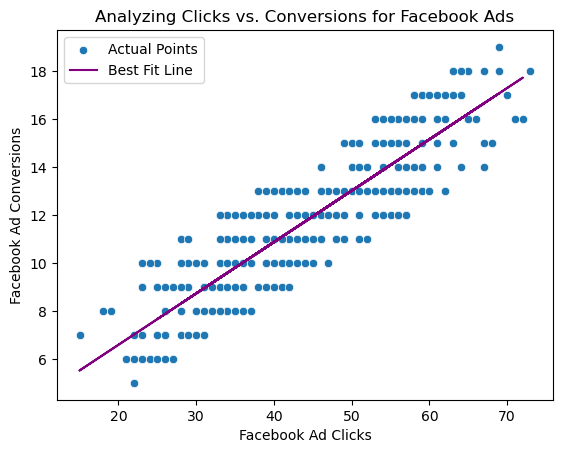

In [456]:
plt.title("Analyzing Clicks vs. Conversions for Facebook Ads")
sns.scatterplot(x= df['Facebook Ad Clicks'],y= df['Facebook Ad Conversions'], label = 'Actual Points')
plt.plot(X_test, y_pred, color = 'purple', label = "Best Fit Line")
plt.legend()
plt.show()

In [506]:
print(f"for {50} clicks the expected conversion rate is {round(model.predict([[50]])[0],2)}")
print(f"for {100} clicks the expected conversion rate is {round(model.predict([[100]])[0],2)}")

for 50 clicks the expected conversion rate is 13.01
for 100 clicks the expected conversion rate is 23.71


* The model does a good job at explaining the relationship between clicks and conversions.
* This suggest that it can effectively predict the facebook conversion rate based on clicks.
* With the insights provide by Linear Regression model, businnes can make informed decisions about resource allocation, budeget planning
  and campaign optimization.
* For instance, knowing expected number of facebook ad conversion based on the certain number of facebook ad clicks can help in setting
  realistic goals, optimizing ad spends and assessing the ROI of facebook adverstising efforts.

* ANALYZING FACEBOOK CAMPAIGN METRIC OVER TIME

In [24]:
df.head()

,Date,Facebook Ad Campaign,Facebook Ad Views,Facebook Ad Clicks,Facebook Ad Conversions,Cost per Facebook Ad,Facebook Click-Through Rate (Clicks / View),Facebook Conversion Rate (Conversions / Clicks),Facebook Cost per Click (Ad Cost / Clicks),AdWords Ad Campaign,AdWords Ad Views,AdWords Ad Clicks,AdWords Ad Conversions,Cost per AdWords Ad,AdWords Click-Through Rate (Clicks / View),AdWords Conversion Rate (Conversions / Click),AdWords Cost per Click (Ad Cost / Clicks)
0,2023-01-01,FB_Jan,2116,18,8,126,0.83,42.73,7.14,AW_Jan,4984,59,5,234,1.18,8.40,3.30
1,2023-01-02,FB_Jan,3106,36,12,104,1.15,34.04,2.91,AW_Jan,4022,71,6,75,1.77,7.80,1.05
2,2023-01-03,FB_Jan,3105,26,8,102,0.84,31.45,3.89,AW_Jan,3863,44,4,141,1.13,9.59,3.23
3,2023-01-04,FB_Jan,1107,27,9,71,2.45,34.76,2.62,AW_Jan,3911,49,5,141,1.26,11.08,2.86
4,2023-01-05,FB_Jan,1317,15,7,78,1.10,47.59,5.38,AW_Jan,4070,55,7,133,1.36,12.22,2.40


In [ ]:
fb =  []

In [30]:
fb_df = df[['Date','Facebook Ad Views','Facebook Ad Clicks','Facebook Ad Conversions','Cost per Facebook Ad', 'Facebook Click-Through Rate (Clicks / View)','Facebook Conversion Rate (Conversions / Clicks)',
                'Facebook Cost per Click (Ad Cost / Clicks)']]

In [56]:
fb_df.head()

,Date,Facebook Ad Views,Facebook Ad Clicks,Facebook Ad Conversions,Cost per Facebook Ad,Facebook Click-Through Rate (Clicks / View),Facebook Conversion Rate (Conversions / Clicks),Facebook Cost per Click (Ad Cost / Clicks),Month,Day
0,2023-01-01,2116,18,8,126,0.83,42.73,7.14,1,1
1,2023-01-02,3106,36,12,104,1.15,34.04,2.91,1,2
2,2023-01-03,3105,26,8,102,0.84,31.45,3.89,1,3
3,2023-01-04,1107,27,9,71,2.45,34.76,2.62,1,4
4,2023-01-05,1317,15,7,78,1.10,47.59,5.38,1,5


In [34]:
#At what time of Month or days of the weeks do we observe the conversion?

In [58]:
fb_df['Month'] = fb_df['Date'].dt.month
fb_df['Day'] = fb_df['Date'].dt.day
fb_df['Week'] = fb_df['Date'].dt.weekday

In [66]:
fb_df

,Date,Facebook Ad Views,Facebook Ad Clicks,Facebook Ad Conversions,Cost per Facebook Ad,Facebook Click-Through Rate (Clicks / View),Facebook Conversion Rate (Conversions / Clicks),Facebook Cost per Click (Ad Cost / Clicks),Month,Day,Week
0,2023-01-01,2116,18,8,126,0.83,42.73,7.14,1,1,6
1,2023-01-02,3106,36,12,104,1.15,34.04,2.91,1,2,0
2,2023-01-03,3105,26,8,102,0.84,31.45,3.89,1,3,1
3,2023-01-04,1107,27,9,71,2.45,34.76,2.62,1,4,2
4,2023-01-05,1317,15,7,78,1.10,47.59,5.38,1,5,3
...,...,...,...,...,...,...,...,...,...,...,...
360,2023-12-27,3240,51,13,63,1.57,25.89,1.24,12,27,2
361,2023-12-28,1510,69,18,97,4.55,25.82,1.42,12,28,3
362,2023-12-29,2918,44,13,49,1.50,29.11,1.11,12,29,4
363,2023-12-30,2212,37,8,102,1.68,22.70,2.75,12,30,5


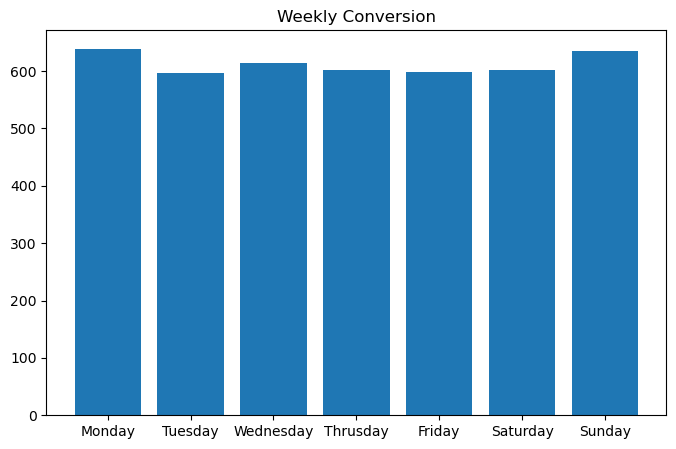

In [85]:
weekly_conversion = fb_df.groupby('Week')['Facebook Ad Conversions'].sum()
week = ['Monday','Tuesday','Wednesday','Thrusday','Friday','Saturday','Sunday']
plt.figure(figsize=(8,5))
plt.bar(week, weekly_conversion)
plt.title("Weekly Conversion")
plt.show()

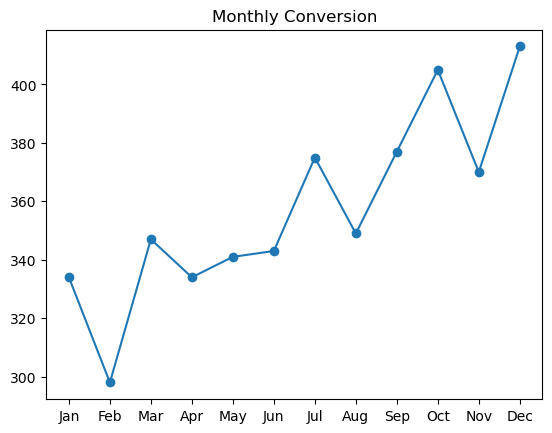

In [103]:
monthly_conv = fb_df.groupby('Month')['Facebook Ad Conversions'].sum()
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.plot(months, monthly_conv,'-o',)
plt.title('Monthly Conversion')
plt.show()

* Best performing months: October and December had the highest conversions, indicating strong seasonal demand
  or effective campaigns
* Slow Periods: February saw the lowest conversions, suggesting a need for strategy adjustments during this time.
* Weekly Trends: Sunday and Monday show higher engagment- teams should focus marketing efforts at the start of the
  week.
* Cost-effectiveness: Some months, like May and November had lower cost-per-conversion, meaning they were more \
  efficient in generating results.

In [125]:
fb_df.head()

,Date,Facebook Ad Views,Facebook Ad Clicks,Facebook Ad Conversions,Cost per Facebook Ad,Facebook Click-Through Rate (Clicks / View),Facebook Conversion Rate (Conversions / Clicks),Facebook Cost per Click (Ad Cost / Clicks),Month,Day,Week
0,2023-01-01,2116,18,8,126,0.83,42.73,7.14,1,1,6
1,2023-01-02,3106,36,12,104,1.15,34.04,2.91,1,2,0
2,2023-01-03,3105,26,8,102,0.84,31.45,3.89,1,3,1
3,2023-01-04,1107,27,9,71,2.45,34.76,2.62,1,4,2
4,2023-01-05,1317,15,7,78,1.10,47.59,5.38,1,5,3


In [139]:
month_df = fb_df.groupby(['Month'])[['Facebook Ad Conversions','Cost per Facebook Ad']].sum().reset_index()

In [145]:
month_df['Cost Per Conversion'] = month_df['Cost per Facebook Ad']/month_df['Facebook Ad Conversions']

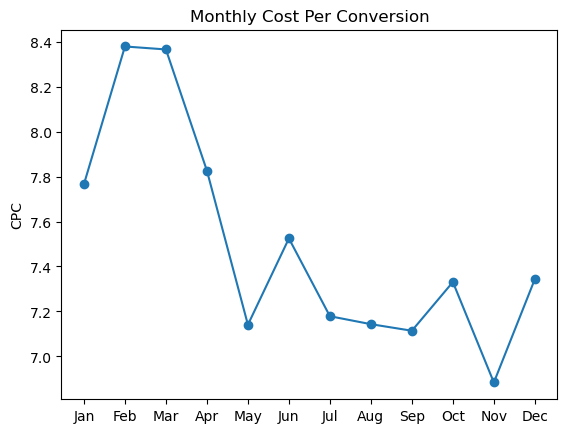

In [159]:
plt.plot(months, month_df['Cost Per Conversion'],'-o',)
plt.title('Monthly Cost Per Conversion')
plt.ylabel("CPC")
plt.show()

* Best Months: October and December had the highest conversion with low CPC.
* Slow Months: Feb and March had thelowest conversions, needing a strategy adustments.
* Cost-Effective Months: May and November had the lower CPC, making campign more efficient.
* Budget Strategy: Reallocate funds from slow months to high performing one for better ROI.

ValueError: x and y must have same first dimension, but have shapes (12,) and (365,)

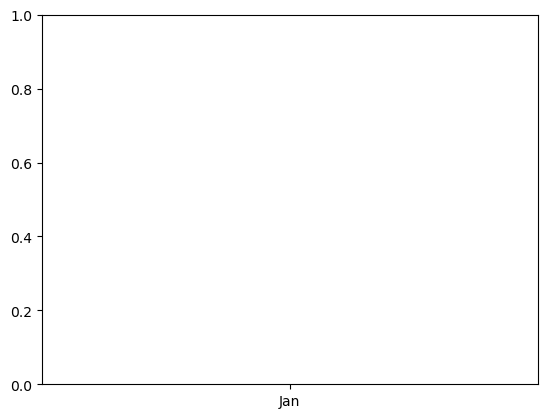

In [189]:
plt.plot(months, df['Cost per AdWords Ad'],'-o')
plt.title('Monthly Cost Per Conversion')
plt.ylabel("CPC")
plt.show()

In [167]:
df.head()

,Date,Facebook Ad Campaign,Facebook Ad Views,Facebook Ad Clicks,Facebook Ad Conversions,Cost per Facebook Ad,Facebook Click-Through Rate (Clicks / View),Facebook Conversion Rate (Conversions / Clicks),Facebook Cost per Click (Ad Cost / Clicks),AdWords Ad Campaign,AdWords Ad Views,AdWords Ad Clicks,AdWords Ad Conversions,Cost per AdWords Ad,AdWords Click-Through Rate (Clicks / View),AdWords Conversion Rate (Conversions / Click),AdWords Cost per Click (Ad Cost / Clicks)
0,2023-01-01,FB_Jan,2116,18,8,126,0.83,42.73,7.14,AW_Jan,4984,59,5,234,1.18,8.40,3.30
1,2023-01-02,FB_Jan,3106,36,12,104,1.15,34.04,2.91,AW_Jan,4022,71,6,75,1.77,7.80,1.05
2,2023-01-03,FB_Jan,3105,26,8,102,0.84,31.45,3.89,AW_Jan,3863,44,4,141,1.13,9.59,3.23
3,2023-01-04,FB_Jan,1107,27,9,71,2.45,34.76,2.62,AW_Jan,3911,49,5,141,1.26,11.08,2.86
4,2023-01-05,FB_Jan,1317,15,7,78,1.10,47.59,5.38,AW_Jan,4070,55,7,133,1.36,12.22,2.40


In [181]:
df['Cost per AdWords Ad']/df['AdWords Ad Conversions']

0      46.800000
1      12.500000
2      35.250000
3      28.200000
4      19.000000
         ...    
360     8.444444
361    20.166667
362    21.333333
363    19.833333
364    14.333333
Length: 365, dtype: float64

In [173]:
df.dtypes

Date                                               datetime64[ns]
Facebook Ad Campaign                                       object
Facebook Ad Views                                           int64
Facebook Ad Clicks                                          int64
Facebook Ad Conversions                                     int64
Cost per Facebook Ad                                       object
Facebook Click-Through Rate (Clicks / View)                object
Facebook Conversion Rate (Conversions / Clicks)            object
Facebook Cost per Click (Ad Cost / Clicks)                 object
AdWords Ad Campaign                                        object
AdWords Ad Views                                            int64
AdWords Ad Clicks                                           int64
AdWords Ad Conversions                                      int64
Cost per AdWords Ad                                        object
AdWords Click-Through Rate (Clicks / View)                 object
AdWords Co

In [179]:
df['Cost per AdWords Ad'] = df['Cost per AdWords Ad'].astype(float)